# **Problem Statement**
**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Connecting to the drive**

In [ ]:
#connecting to the google drive
from google.colab import drive 
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the reuired libraries**

In [ ]:
#importing the required Libraries for Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from datetime import date
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Loading the dataset**

In [ ]:
#importing the dataset
data = pd.read_csv("/content/drive/MyDrive/Capstone/Machine Learning/Data/Supervised/Regression/SeoulBikeData.csv", encoding='ISO-8859-1')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#size of the dataset
data.shape 

(8760, 14)

In [ ]:
#following are the available columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#finding the number of unique values in the whole dataset
data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#showing the data type of features
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# **Data Cleaning**

**Checking for null values**

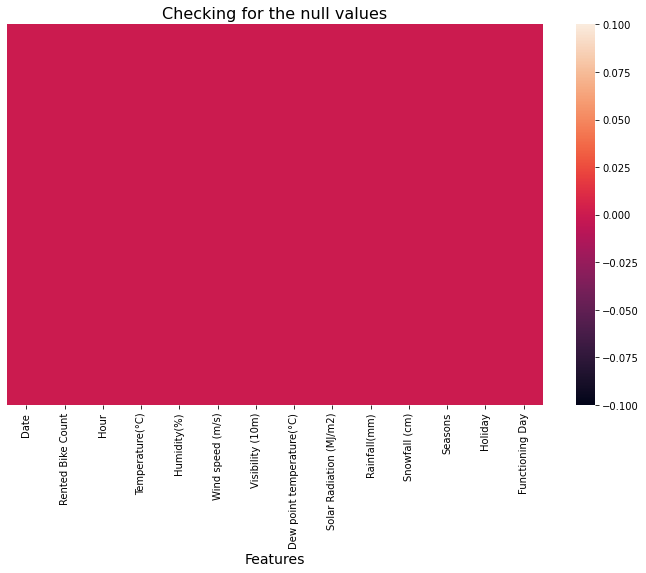

In [ ]:
#visualization of NaN values
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), yticklabels=False)
plt.title('Checking for the null values', size=16)
plt.xlabel('Features', size=14)
plt.show()

# **Data Visualization**

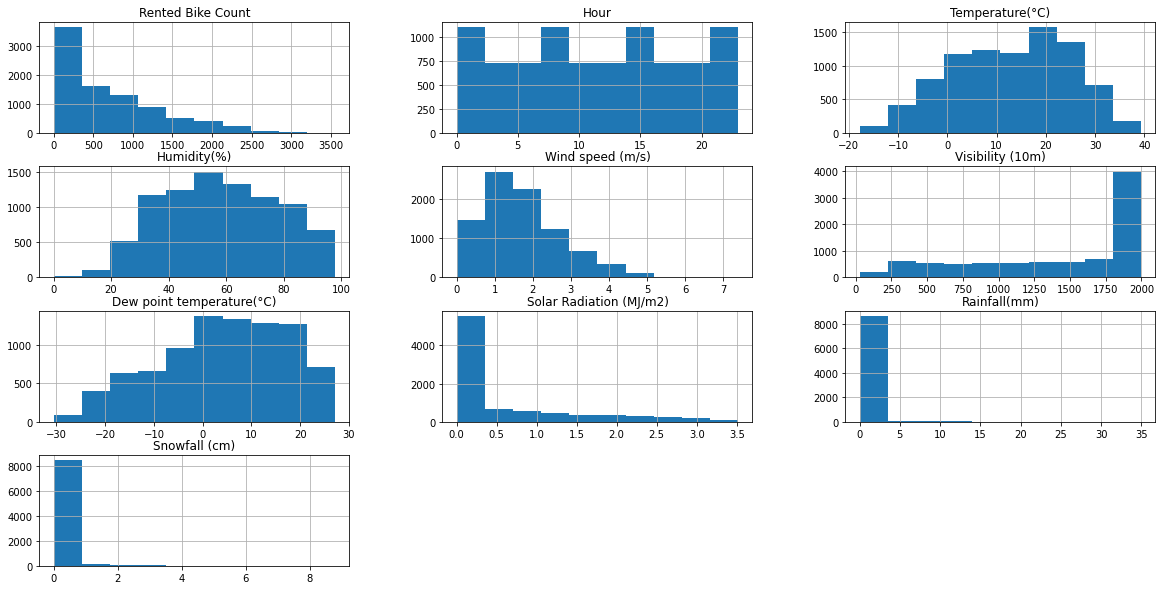

In [ ]:
#visualization of distribution of whole data in histogram
data.hist(figsize=(20, 10))
plt.show()

In [ ]:

#changing the format of date and adding some columns for analysis
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_name'] = data['Date'].dt.day_name()

In [ ]:
#dataframe after adding the columns
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_name
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday


**Correlation Heatmap**

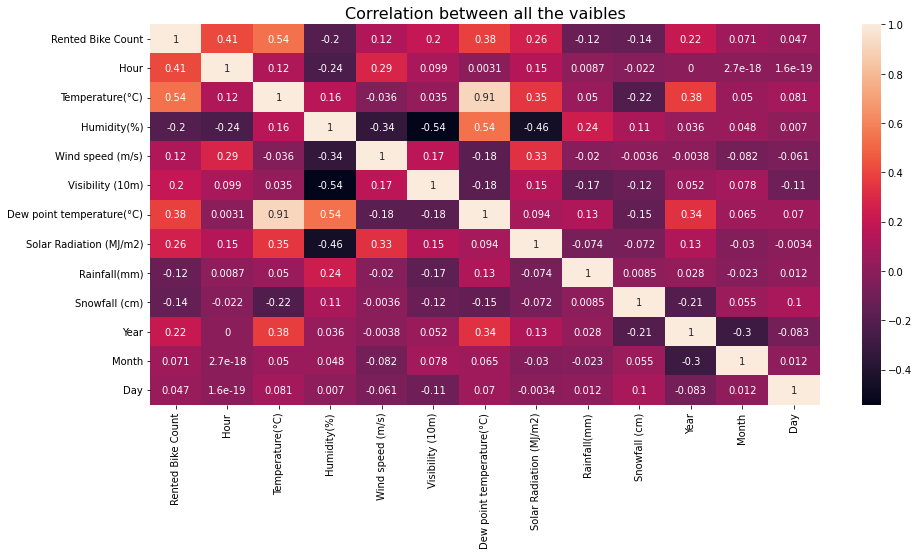

In [ ]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

**Table showing the correlation between all the features with the Rented Bike Count**

In [ ]:
#checking the correlation between all the features with Close price
correlation = data.corr()
var_corr = correlation[['Rented Bike Count']]
var_corr 

,Rented Bike Count
Rented Bike Count,1.000000
Hour,0.410257
Temperature(°C),0.538558
Humidity(%),-0.199780
Wind speed (m/s),0.121108
Visibility (10m),0.199280
Dew point temperature(°C),0.379788
Solar Radiation (MJ/m2),0.261837
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804


**Checking for Outliers**

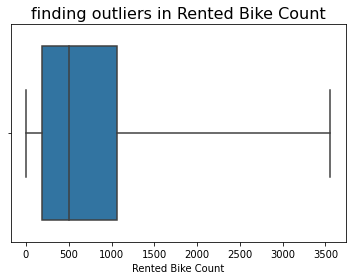

In [ ]:
#checking for outliers
sns.boxplot(data=data, x='Rented Bike Count', whis=3)
plt.title('finding outliers in Rented Bike Count', size=16)
plt.show()

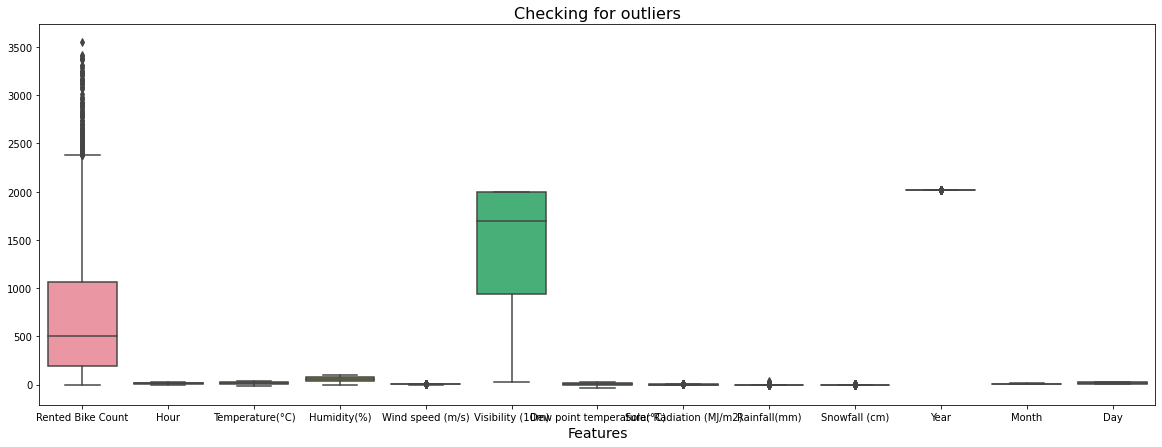

In [ ]:
#checking for outliers
plt.figure(figsize=(20,7))
sns.boxplot(data=data)
plt.title('Checking for outliers', size=16)
plt.xlabel('Features', size=14)
plt.show()

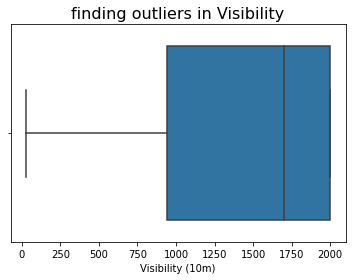

In [ ]:
#checking for outliers
sns.boxplot(data=data, x='Visibility (10m)', whis=3)
plt.title('finding outliers in Visibility', size=16)
plt.show()

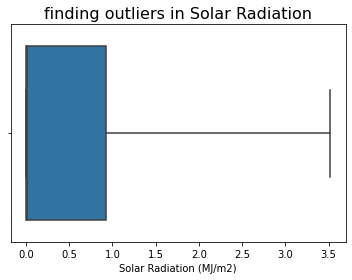

In [ ]:
#checking for outliers
sns.boxplot(data=data, x='Solar Radiation (MJ/m2)', whis=3)
plt.title('finding outliers in Solar Radiation', size=16)
plt.show()

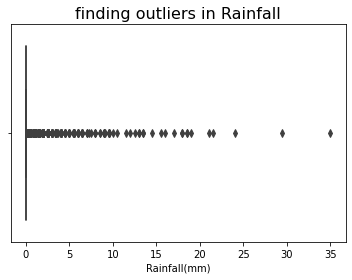

In [ ]:
#checking for outliers
sns.boxplot(data=data, x='Rainfall(mm)', whis=3)
plt.title('finding outliers in Rainfall', size=16)
plt.show()

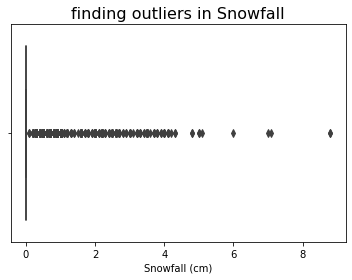

In [ ]:
#checking for outliers
sns.boxplot(data=data, x='Snowfall (cm)', whis=3)
plt.title('finding outliers in Snowfall', size=16)
plt.show()

In [ ]:
#renaming the columns
data['Visibility'] = data['Visibility (10m)'].apply(lambda x: 1 if x >= 2000 else 0)
data['Solar Radiation'] = data['Solar Radiation (MJ/m2)'].apply(lambda x: 1 if x >= 0.56 else 0)
data['Rainfall'] = data['Rainfall(mm)'].apply(lambda x: 1 if x > 0.15 else 0)
data['Snowfall'] = data['Snowfall (cm)'].apply(lambda x: 1 if x > 0.75 else 0)

By observing the above outlier boxplots the distinction was made

In [ ]:
data.rename(columns={'Dew point temperature(°C)':'Dew point temperature', 'Wind speed (m/s)':'Wind speed', 
                     'Humidity(%)':'Humidity', 'Temperature(°C)':'Temperature'}, inplace = True)

In [ ]:
#changing the chategorical features into the numerical features
data['Functioning_day'] = data['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)
data['HoliDay'] = data['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

**Functioning day Vs Rented Bike count Vs Hours**

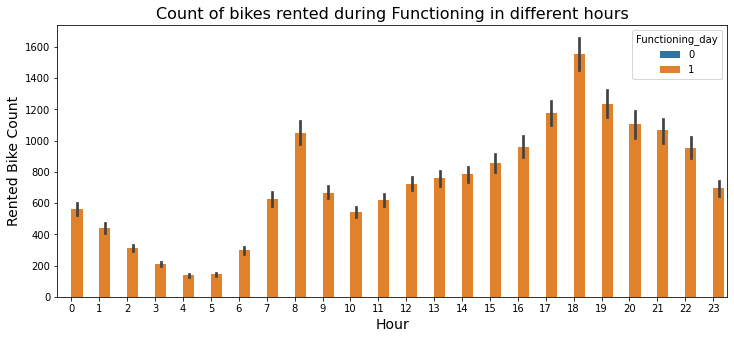

In [ ]:
#Functioning day value counts
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', hue='Functioning_day', y='Rented Bike Count', data=data)
plt.title("Count of bikes rented during Functioning in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

We can see that there are no bikes are rented on non functioning day

**Functioning day Vs Value counts**

In [ ]:
data['Functioning_day'].value_counts()

1    8465
0     295
Name: Functioning_day, dtype: int64

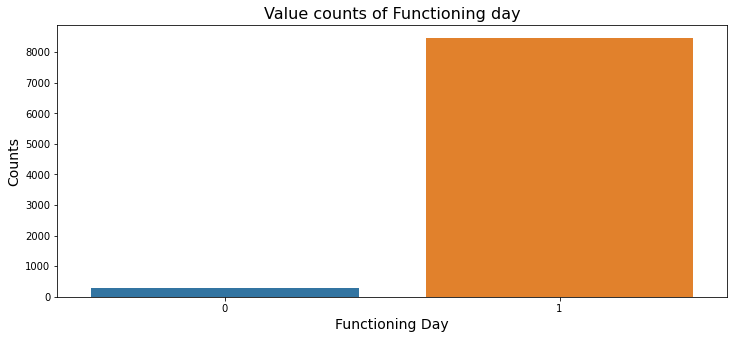

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data['Functioning_day'])
plt.xlabel('Functioning Day', size=14)
plt.ylabel('Counts', size=14)
plt.title('Value counts of Functioning day', size=16)
plt.show()

Eventhough we have records on non functioning day the rented bike count is 0

In [ ]:
data = data[data['Functioning_day']!=0]

So, thats better to drop the non functioning day data

**Holiday Vs Rented Bike count Vs Hours**

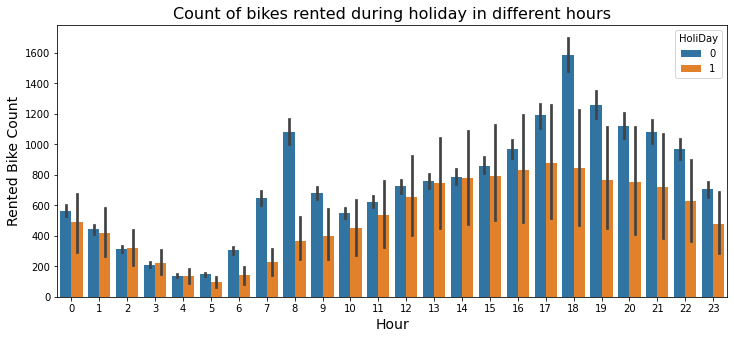

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', y='Rented Bike Count', hue='HoliDay', data=data)
plt.title("Count of bikes rented during holiday in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

The above figure shows the bike rented count during holidays in different hours

**Snowfall Vs Rented Bike count Vs Hours**

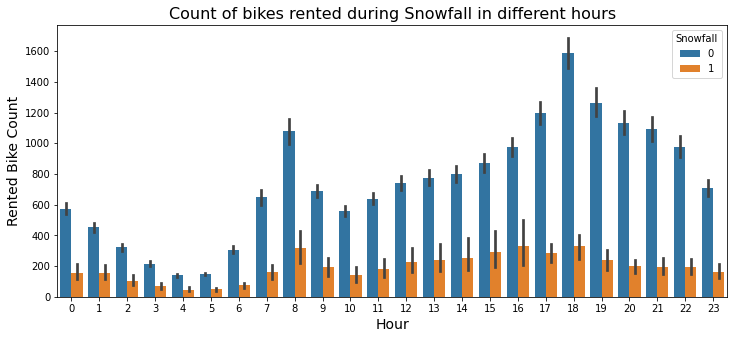

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', y='Rented Bike Count', hue='Snowfall', data=data)
plt.title("Count of bikes rented during Snowfall in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

The above figure shows the bike rented count during snowfall in different hours

**Rainfall Vs Rented Bike count Vs Hours**

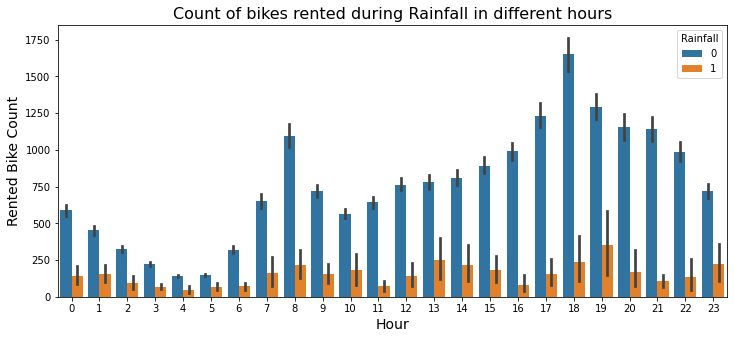

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', y='Rented Bike Count', hue='Rainfall', data=data)
plt.title("Count of bikes rented during Rainfall in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

The above figure shows the bike rented count during rainfall in different hours

**Seasons vs Rented Bike Count vs Hour**

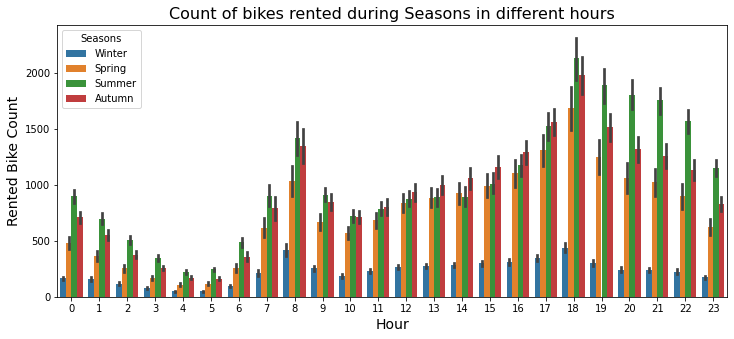

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=data)
plt.title("Count of bikes rented during Seasons in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

**Visibility vs Rented Bike Count vs Hour**

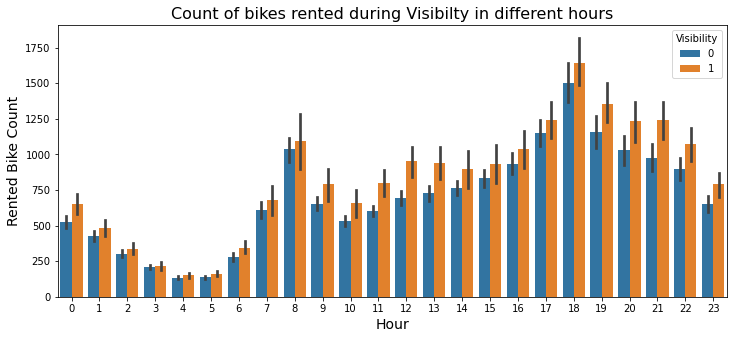

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', y='Rented Bike Count', hue='Visibility', data=data)
plt.title("Count of bikes rented during Visibilty in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

In [ ]:
#selecting some features for analysis
parameters = ['Month', 'Day', 'Day_name', 'Hour', 'HoliDay', 'Visibility',
              'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Year']

**Table form of value counts**

In [ ]:
#showing the value counts in tabular format
for col in parameters:
  print(f'{col} and their value counts')
  print(data[col].value_counts())
  print('-------------------------------------')

Month and their value counts
7     744
5     744
12    744
1     744
8     744
3     720
10    720
4     696
11    696
6     689
2     648
9     576
Name: Month, dtype: int64
-------------------------------------
Day and their value counts
8     288
1     288
3     288
25    288
17    288
27    288
23    288
12    288
20    288
9     288
13    288
2     288
21    288
24    288
6     288
14    288
22    288
16    288
7     288
15    288
26    288
4     264
18    264
19    264
28    264
5     264
29    264
30    240
11    216
10    209
31    168
Name: Day, dtype: int64
-------------------------------------
Day_name and their value counts
Thursday     1248
Wednesday    1248
Saturday     1224
Sunday       1217
Tuesday      1200
Friday       1176
Monday       1152
Name: Day_name, dtype: int64
-------------------------------------
Hour and their value counts
23    353
12    353
8     353
16    353
9     353
17    353
10    353
18    353
11    353
15    353
19    353
20    353
13    353
21   

**Visualization of value counts**

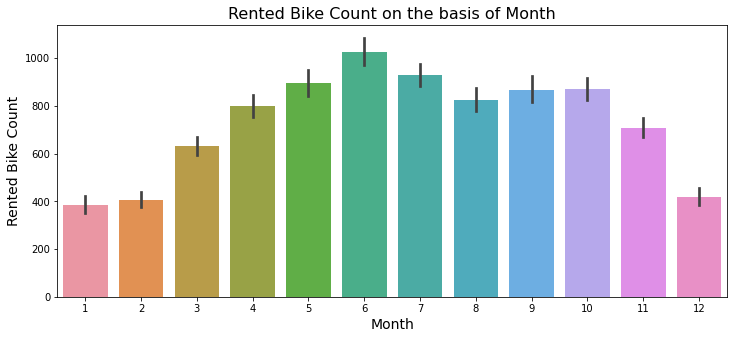

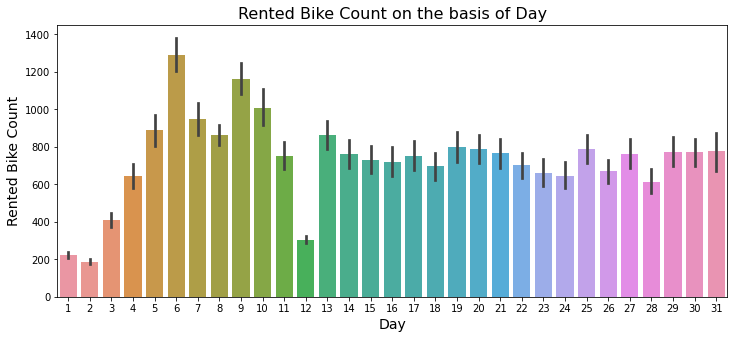

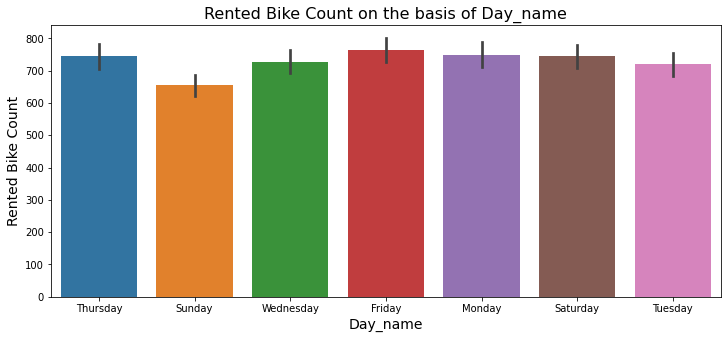

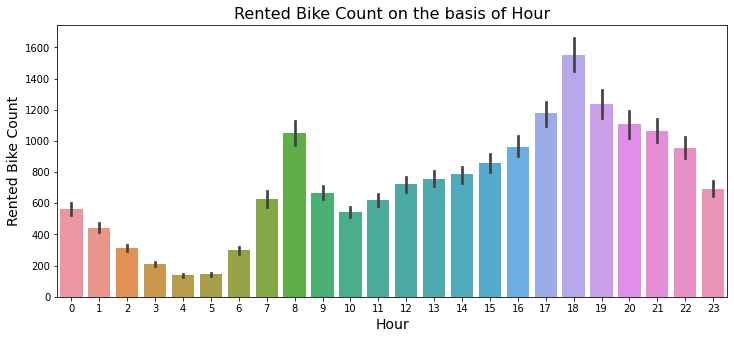

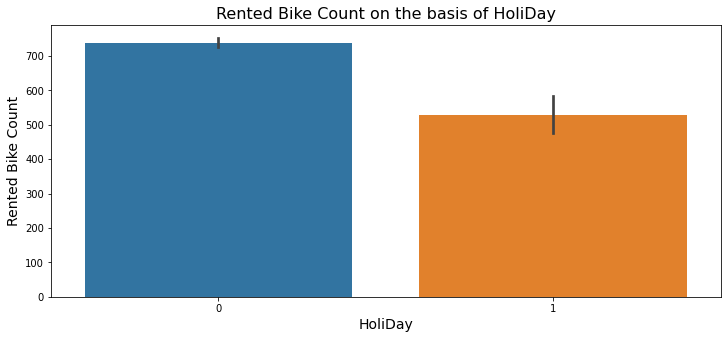

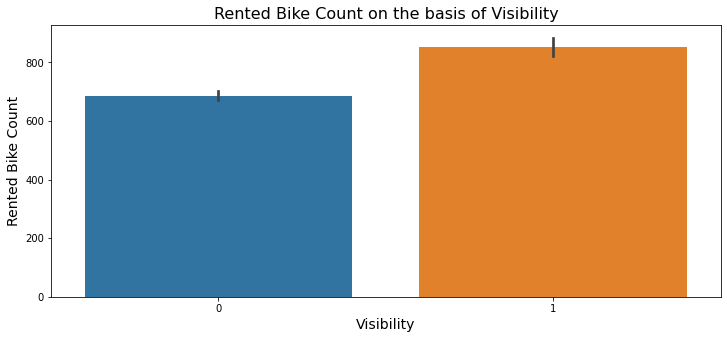

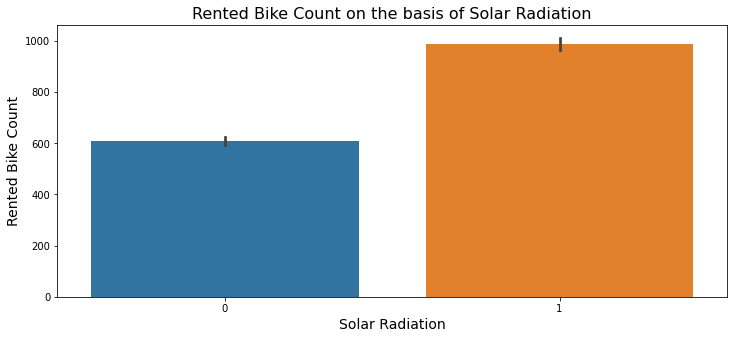

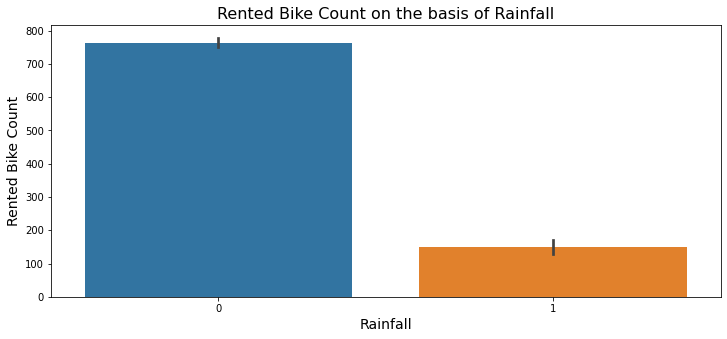

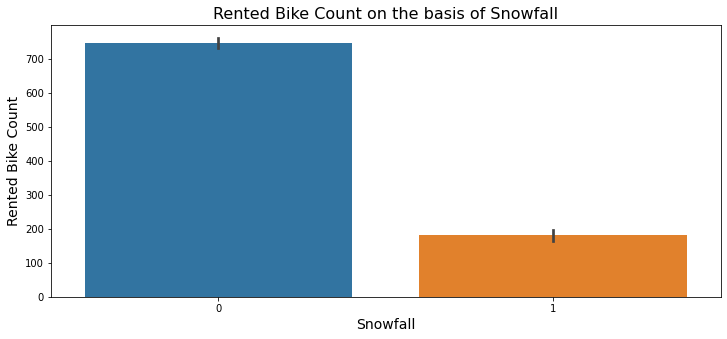

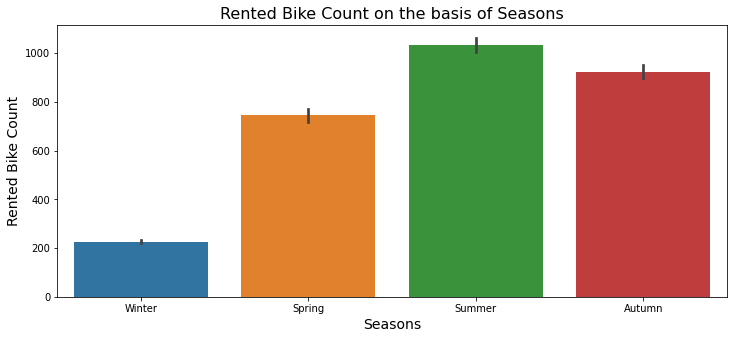

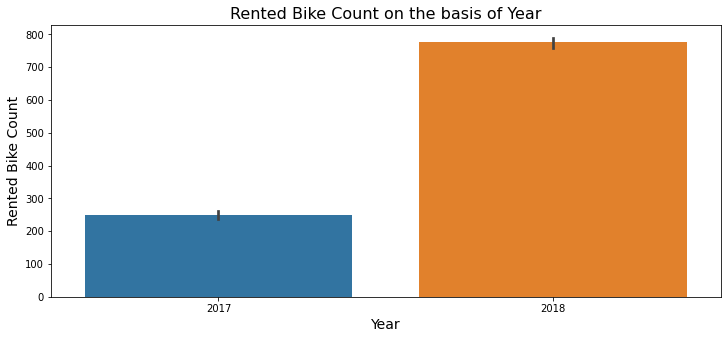

In [ ]:
#visualization of the value counts
for col in parameters:
  fig = plt.figure(figsize=(12, 5))
  ax = fig.gca()
  feature = 'Rented Bike Count'
  sns.barplot(x=col, y=feature, data=data, ax=ax)
  plt.xlabel(col, size=14)
  plt.ylabel(feature, size=14)
  plt.title(f"Rented Bike Count on the basis of {col}", size=16)
  plt.show()

**Density plot of Rented Bike Count**

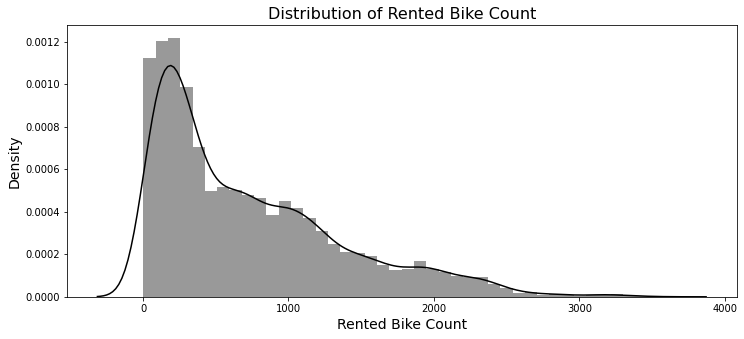

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(data['Rented Bike Count'], color='k')
plt.title('Distribution of Rented Bike Count', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.ylabel('Density', size=14)
plt.show()

**Forming a New Data Frame**

In [ ]:
#preparing the new data frame with selected columns
bike_df = data[['Year', 'Month', 'Day', 'Day_name', 'Rented Bike Count', 'Hour',  'HoliDay',  'Visibility','Temperature', 'Humidity', 
             'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Wind speed']]

bike_df.head()

,Year,Month,Day,Day_name,Rented Bike Count,Hour,HoliDay,Visibility,Temperature,Humidity,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Wind speed
0,2017,1,12,Thursday,254,0,0,1,-5.2,37,-17.6,0,0,0,Winter,2.2
1,2017,1,12,Thursday,204,1,0,1,-5.5,38,-17.6,0,0,0,Winter,0.8
2,2017,1,12,Thursday,173,2,0,1,-6.0,39,-17.7,0,0,0,Winter,1.0
3,2017,1,12,Thursday,107,3,0,1,-6.2,40,-17.6,0,0,0,Winter,0.9
4,2017,1,12,Thursday,78,4,0,1,-6.0,36,-18.6,0,0,0,Winter,2.3


In [ ]:
bike_df.columns

Index(['Year', 'Month', 'Day', 'Day_name', 'Rented Bike Count', 'Hour',
       'HoliDay', 'Visibility', 'Temperature', 'Humidity',
       'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Wind speed'],
      dtype='object')

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   8465 non-null   int64  
 1   Month                  8465 non-null   int64  
 2   Day                    8465 non-null   int64  
 3   Day_name               8465 non-null   object 
 4   Rented Bike Count      8465 non-null   int64  
 5   Hour                   8465 non-null   int64  
 6   HoliDay                8465 non-null   int64  
 7   Visibility             8465 non-null   int64  
 8   Temperature            8465 non-null   float64
 9   Humidity               8465 non-null   int64  
 10  Dew point temperature  8465 non-null   float64
 11  Solar Radiation        8465 non-null   int64  
 12  Rainfall               8465 non-null   int64  
 13  Snowfall               8465 non-null   int64  
 14  Seasons                8465 non-null   object 
 15  Wind

In [ ]:
#value counts for seasons
bike_df.Seasons.value_counts()

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64

**Dummy Variables**

In [ ]:
#onehot encoding of seasons 
bike_df['Seasons'] = pd.get_dummies(data['Seasons'], drop_first=True)

In [ ]:
#value counts after convering the seasons column into a numerical feature
bike_df['Seasons'].value_counts()

0    6305
1    2160
Name: Seasons, dtype: int64

**Variance Inflation Factor**

In [ ]:
def cal_vif(X):
  vif = pd.DataFrame()
  vif['Variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

In [ ]:
cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in['Date', 'Year', 'Temperature']]])

,Variables,VIF
0,Month,4.760655
1,Day,3.878677
2,Rented Bike Count,4.478065
3,Hour,5.020353
4,HoliDay,1.064289
5,Visibility,1.446788
6,Humidity,8.396562
7,Dew point temperature,2.130926
8,Solar Radiation,1.997640
9,Rainfall,1.335496


As Date, Year and Temperature have high correlation score they are dropped from the analysis.

**Dependent and Independent Variables**

In [ ]:
#defining dependent and independent variables 
dependent_variable = 'Rented Bike Count'
independent_variable = ['Hour', 'Humidity', 'Wind speed', 'Dew point temperature', 'Month', 'HoliDay',  
                        'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Day']

**Defing the X and y variables**

In [ ]:
#defining X and y varaibles 
y = bike_df[dependent_variable]
X = bike_df[independent_variable]

# **Model Implementation**
**Importing the required libraries for Liner Regression Analysis**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [ ]:
#splitting train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (6772, 12)
Size of X_test is: (1693, 12)
Size of y_train is: (6772,)
Size of y_test is: (1693,)


In [ ]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Linear Regression**

In [ ]:
#Creating the Linear regression object
regressor = LinearRegression()
#Train the model using the training set
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#linear regression scoe
regressor.score(X_train, y_train)

0.5363372801471145

In [ ]:
#defining the predicted values 
pred_train = regressor.predict(X_train)
pred_test = regressor.predict(X_test)

**Visualization of trainset output**

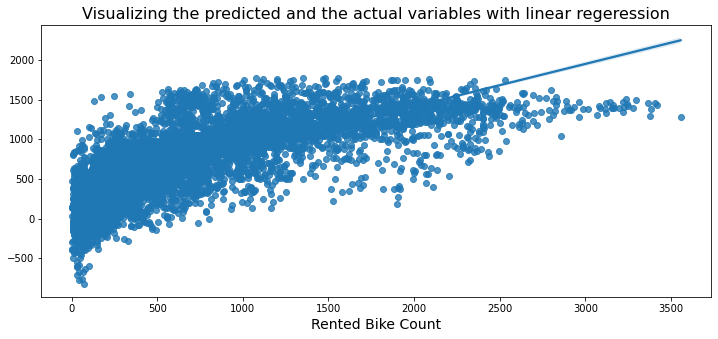

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y_train, pred_train)
plt.title('Visualizing the predicted and the actual variables with linear regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

**Visualization of testset output**

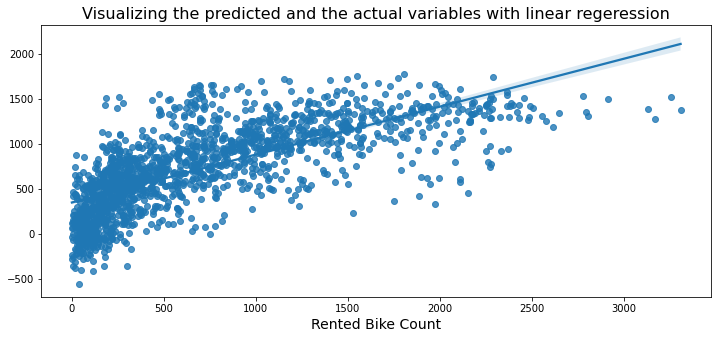

In [ ]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_test, pred_test)
plt.title('Visualizing the predicted and the actual variables with linear regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

#**Model Evaluation**

**Mean Squared Error**

In [ ]:
#Mean Squared Error on Training set 
MSE_train = mean_squared_error(y_train, pred_train)
MSE_train 

193487.6680219974

In [ ]:
#Mean Squared Error on Test set 
MSE_test = mean_squared_error(y_test, pred_test)
MSE_test 

191262.5049036467

**Root Mean Squared Error**

In [ ]:
#Root Mean Squared Error on Training set
RMSE_train = np.math.sqrt(MSE_train)
RMSE_train 

439.8723315031276

In [ ]:
#Root Mean Squared Error on Test set
RMSE_test = np.math.sqrt(MSE_test)
RMSE_test 

437.33568903491823

**R2 Score**

In [ ]:
#R2 Score on Training set 
R2_score_train = r2_score(y_train, pred_train)
R2_score_train

0.5363372801471145

In [ ]:
#R2 Score on Test set
R2_score_test = r2_score(y_test, pred_test)
R2_score_test 

0.5133524012839992

In [ ]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_score_train}')

MSE= 193487.6680219974
RMSE= 439.8723315031276
R2_Score= 0.5363372801471145


In [ ]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_score_test}')

MSE= 191262.5049036467
RMSE= 437.33568903491823
R2_Score= 0.5133524012839992


The Score for linear regression is around 0.5363 which is near to 1. That means 54% of the model performance is good.

In training set the accuracy score is 53.63%.

While the accuracy score on test data is 51.34%.

Which means the model needs to be trained with more data.

# **Lasso Regression**

**Importing the required libraries for Lasso and Ridge Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
#Cross Validation
lasso = Lasso()
param = {'alpha':[1e-15, 1e-10, 1e-7, 1e-5, 1e-3, 1e-2, 1e-1, 1, 2, 4, 7, 15, 30, 50, 60, 100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-07, 1e-05, 0.001, 0.01, 0.1,
                                   1, 2, 4, 7, 15, 30, 50, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
#the lasso regressor best parameters
lasso_regressor.best_params_ 

{'alpha': 1}

In [ ]:
#the Lasso Regressor Score
lasso_regressor.best_score_

-194116.85319283992

In [ ]:
#defining the predicted variable
pred_test_l = lasso_regressor.predict(X_test)

**Model Evaluation**

In [ ]:
MSE_test = mean_squared_error(y_test, pred_test_l)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test_l)
print(f'R2_Score= {R2_score_test}')

MSE= 191164.5712273227
RMSE= 437.22370844605706
R2_Score= 0.5133524012839992


**Visualization of output**

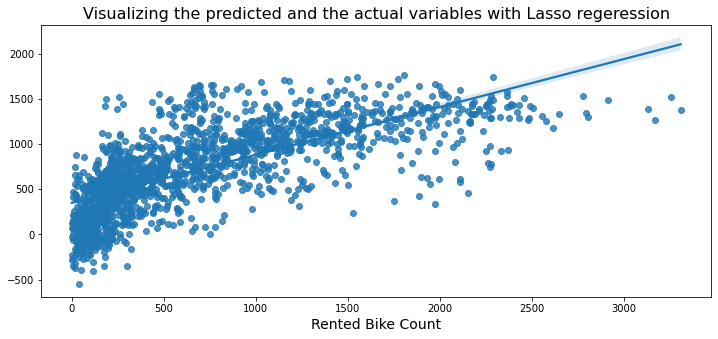

In [ ]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_test, pred_test_l)
plt.title('Visualizing the predicted and the actual variables with Lasso regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

In Lasso regression the best hyper parameter tuning is at alpha is 1, accuracy score for test data is at 51% and lasso regressor score is -194116.8532 and not in a good range to consider the lasso regression for training the model.

# **Ridge Regression**

In [ ]:
#Cross Validation
ridge = Ridge()
param = {'alpha':[1e-15, 1e-10, 1e-7, 1e-5, 1e-3, 1e-2, 1e-1, 1, 2, 4, 7, 15, 30, 50, 60, 100]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-07, 1e-05, 0.001, 0.01, 0.1,
                                   1, 2, 4, 7, 15, 30, 50, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
#the ridge regressor best parameters 
ridge_regressor.best_params_

{'alpha': 2}

In [ ]:
#the Ridge Regressor Score 
ridge_regressor.best_score_

-194143.69300766013

In [ ]:
#defining the predicted variable
pred_test_r = ridge_regressor.predict(X_test)

**Model Evaluation**

In [ ]:
MSE_test = mean_squared_error(y_test, pred_test_r)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test_r)
print(f'R2_Score= {R2_score_test}')

MSE= 191252.97398329436
RMSE= 437.3247923263605
R2_Score= 0.5133524012839992


**Visualization of output**

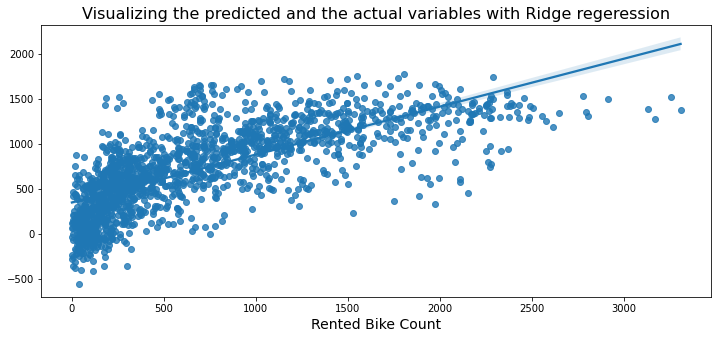

In [ ]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_test, pred_test_r)
plt.title('Visualizing the predicted and the actual variables with Ridge regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

In Ridge regression best hyper parameter tuning is at alpha is 2, the accuracy score for test data is at 51% and ridge regressor score is around -194143.6930 and not in a good range. Even thoug its performance is better than lasso, its not good to consider for training the model.

# **Decision Tree Classifier**

**Required Libraries for Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import display
from IPython.display import SVG
from graphviz import Source 

In [ ]:
#defining dependent and independent variables 
dependent_variable = 'Rented Bike Count'
independent_variable = ['Hour', 'Humidity', 'Wind speed', 'Dew point temperature', 'Month', 'HoliDay',  
                        'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Day']

**Defining the X and y Variables**

In [ ]:
#Defining the X and y Variables 
y = bike_df[dependent_variable]
X = bike_df[independent_variable]

In [ ]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

**Scaling the data**

In [ ]:
#scalling the data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(X_train) 

In [ ]:
#scaled features are stored in a data frame
scaled_data = pd.DataFrame(scaled_features, columns=X.columns)

**Implementation of Decision Tree Classifier**

In [ ]:
#implementation of Decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#defining the predicted values
pred_test = clf.predict(X_test)

**Visualization of Decision Tree Classifier**

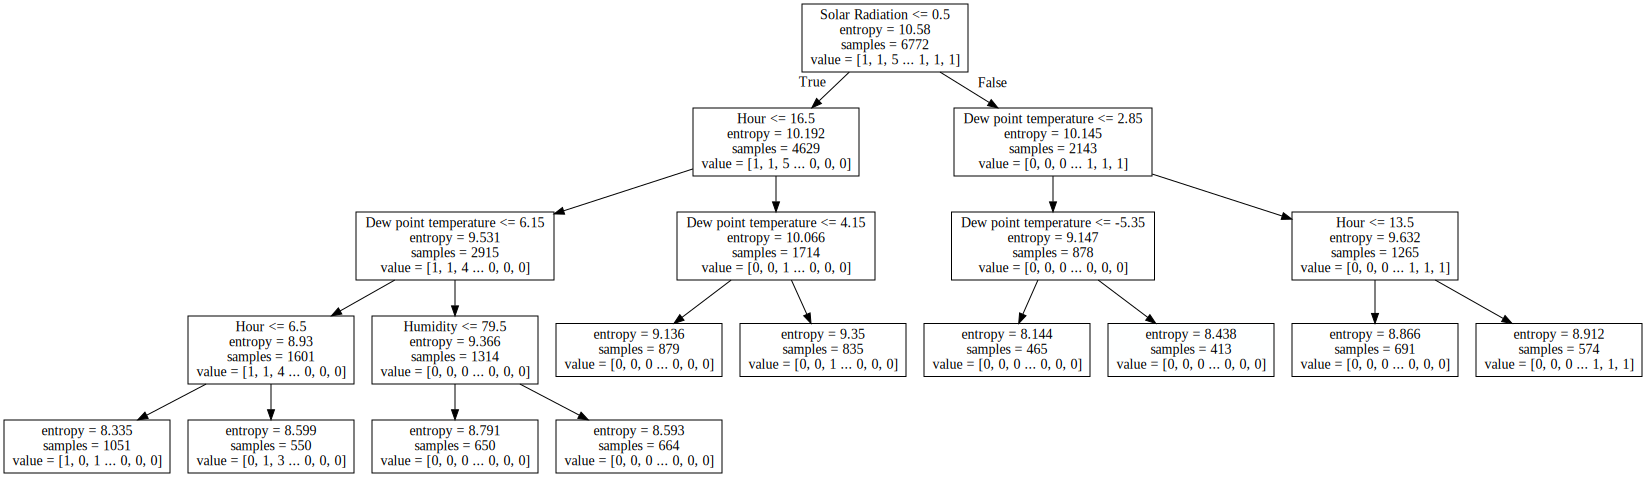

In [ ]:
graph = Source(export_graphviz(clf, out_file=None,feature_names=X.columns, filled=True))
display(SVG(graph.pipe(format='svg'))) 

# **Conclusion**



As per the evaluation its better to implement the Linear Regression rather than going for Lasso, Ridge Regressions and Decision tree classifier. 
But when it comes to accuracy the model is not good to implement as it needs to be trained with more data to get better accuracy.